# Importing libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the data

In [3]:
df = pd.read_csv('https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv')
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


# Familiarizing with the data

We can get a few random samples of the dataframe using the function sample() to better understand the data we'll be working with we can also use this function to see if we immediately find any incorrect data.

In [4]:
df.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9380,Rua Princesa Leopoldina,Alto da Lapa,São Paulo,150,3,4,4,R$ 1.600.000
3284,Rua Palmares,Brooklin Paulista,São Paulo,652,4,6,4,R$ 25.000\n /Mês
6321,Alameda Calicut,Chácara Santo Antônio (Zona Sul),São Paulo,450,4,6,8,R$ 3.750.000
2352,NaN,Jardim Monte Kemel,São Paulo,158,2,1,1,R$ 480.000
4115,Rua Dom Lúcio de Sousa,Vila Gumercindo,São Paulo,177,4,4,1,R$ 799.000
7258,Rua Magino Roberto de Oliveira,Vila Independência,São Paulo,100,3,2,2,R$ 420.000
429,Rua Januário Cardoso,Vila Nova Conceição,São Paulo,550,2,4,2,R$ 15.500.000
7842,Rua Professor Apolinário Porto Alegre,Jardim D'Abril,São Paulo,81,2,1,2,R$ 319.800
4997,Rua Laiana,Alto de Pinheiros,São Paulo,360,3,7,6,R$ 5.500.000
7334,Rua Honduras,Jardim Paulista,São Paulo,360,4,6,8,R$ 7.497.000


In the example above we can probably see (depending on the samples you get) that are some null data that may not serve us. For the purpose of getting used on how to clean this sort of data, I'll be removing them, but know that in cases like this it might not be the best sollution once we may have relevant data.

#### In case we want to get some specific data that we already know it's index, we can use the iloc() function

In [5]:
df.iloc[[1081]]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
1081,Rua Paris,Sumaré,São Paulo,235,1,3,3,R$ 2.200.000


# Useful information about the sort of data we have

The info we'll find here will be important once they show us which type of data we'll be working with.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In this case, if we wanted to work with the column "Valor" we'd face some problems cause of it's format. First we'll have to change the type of data, and only then we can start extracting infos of that column. Note that the other columns that are already in the format "int64" are columns that we can work with.

# Challenge: Find out which neighborhoods have empty street names

In [7]:
empty_street = df[['Bairro', 'Rua']]
empty_street[empty_street['Rua'].isnull()].reset_index()

,index,Bairro,Rua
0,3,Jardim Morumbi,NaN
1,11,Jardim Luzitânia,NaN
2,31,Parque da Lapa,NaN
3,56,Chácara Santo Antônio (Zona Sul),NaN
4,57,Jardim Guedala,NaN
...,...,...,...
3429,9963,Jardim Petrópolis,NaN
3430,9989,Parque Alves de Lima,NaN
3431,9991,Vila Formosa,NaN
3432,9995,Jardim Leonor,NaN


As we can see, we have 3434 rows with empty street name. We could use this way to find out if there's any other column with empty data.

# Cleaning null data

In [8]:
clean_data = df.dropna().reset_index().drop(columns='index')
clean_data

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000
...,...,...,...,...,...,...,...,...
6557,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
6558,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
6559,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
6560,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


# Calculating usefull infos

#### Average of square metter per neighborhood

In [9]:
mean = clean_data.groupby(['Bairro']).mean()
mean[['Metragem']]

,Metragem
Bairro,
Aclimação,254.523256
Alto da Boa Vista,393.714286
Alto da Lapa,271.210526
Alto da Mooca,186.200000
Alto de Pinheiros,430.758333
...,...
Vila dos Remédios,131.666667
Vila Água Funda,152.200000
Água Branca,157.545455


#### Count of properties per neighborhood

In [10]:
ppt_ngb = clean_data.groupby(['Bairro']).count().sort_values('Metragem', ascending=False)
ppt_ngb[['Metragem']][:10]

,Metragem
Bairro,
Alto de Pinheiros,240
Jardim Guedala,213
Brooklin Paulista,172
Jardim Paulista,171
Vila Mariana,165
Pacaembu,159
Planalto Paulista,158
Vila Madalena,141
Cidade Jardim,115


This way we can easily see that "Alto de Pinheiros" has the largest number os properties for sale.

#### Other way to get the same counting we want, but way simpler

In [11]:
ppt_ngb1 = clean_data['Bairro'].value_counts()
ppt_ngb1

Alto de Pinheiros       240
Jardim Guedala          213
Brooklin Paulista       172
Jardim Paulista         171
Vila Mariana            165
                       ... 
Vila Independência        1
Vila Jaguara              1
Parque CíSão Pauloer      1
Mandaqui                  1
Jardim Maria Augusta      1
Name: Bairro, Length: 604, dtype: int64

#### Total average of the square metter

In [12]:
clean_data['Metragem'].mean()

455.7546479731789

Once we have this info, we can now go into a more detailed analisys about which properties are above or below the average, just for starters.

# Filtering data from specific neighborhoods

In [13]:
filter = clean_data[clean_data['Bairro'] == 'Água Fria']
filter

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
1756,"Rua Marambá, 35",Água Fria,São Paulo,200,4,4,5,R$ 1.270.000
3321,Rua Corneteiro Jesus,Água Fria,São Paulo,170,3,5,2,R$ 1.290.000
3555,Rua Antônio Lourenço,Água Fria,São Paulo,242,4,5,2,R$ 1.300.000
3645,Rua Corneteiro Jesus,Água Fria,São Paulo,175,3,5,2,R$ 1.290.000
4653,Rua Helvídio Gouveia,Água Fria,São Paulo,80,2,1,2,R$ 395.000
5377,Rua Corneteiro de Jesus,Água Fria,São Paulo,250,3,4,2,R$ 1.200.000
6014,Rua Antônio Lourenço,Água Fria,São Paulo,314,3,4,3,R$ 1.195.000
6182,Rua Corneteiro de Jesus,Água Fria,São Paulo,174,3,3,2,R$ 1.250.000
6467,Rua Padre Agostinho Poncet,Água Fria,São Paulo,60,2,2,2,R$ 395.000
6499,Rua Padre Agostinho Poncet,Água Fria,São Paulo,65,2,2,2,R$ 395.000


Note that we're using "Água Fria" as the neighborgood we want to extract infos, but we could change that into any other one presented on our dataframe

# Chart plotting 

First let's use an easy example and try the bedroom average for our properties

In [14]:
bdr_avg = clean_data['Quartos'].mean()
bdr_avg

3.431575739103932

Now let's see how many properties are above that average

In [15]:
c = 0
for item in clean_data['Quartos']:
    if item > bdr_avg:
        c += 1
c

2743

That way, we ffound out there's 2743 properties that have more than 3.43 bedrooms. We can also put that in a chart for better visualization.

First let's see how many properties we have in our dataframe.

In [16]:
total_data = clean_data.tail(1).index.tolist()
total_data

[6561]

Now we just need to calculate the proportions

In [17]:
greater_bdr_avg = c / (total_data[0]+1)
lower_bdr_avg = 1 - greater_bdr_avg

And finally plot it

Text(0.5, 1.0, 'Properties average bedroom ratio')

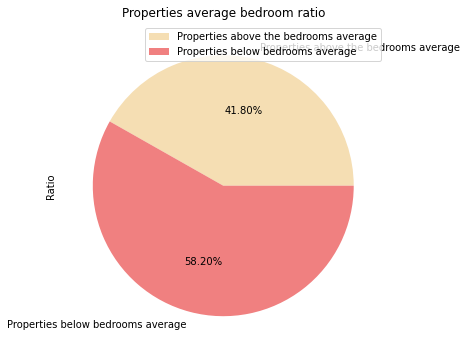

In [18]:
pie_chart = pd.DataFrame({'Ratio':[greater_bdr_avg, lower_bdr_avg]}, index=['Properties above the bedrooms average', 'Properties below bedrooms average'])
chart = pie_chart.plot.pie(y='Ratio', figsize=(6, 6), colors = ['wheat', 'lightcoral'], autopct = "%.2f%%")
chart.set_title('Properties average bedroom ratio')

#### We can also find out which properties are those

In [19]:
clean_data[clean_data['Quartos'] > bdr_avg]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000
5,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,R$ 850.000
...,...,...,...,...,...,...,...,...
6543,Rua Albertina de Oliveira Godinho,Jardim Guedala,São Paulo,1305,5,7,6,R$ 5.900.000
6550,Rua Circular do Bosque,Jardim Guedala,São Paulo,655,5,6,4,R$ 5.000.000
6552,Rua Tapes,Jardim Aeroporto,São Paulo,157,5,7,4,R$ 840.000
6553,Rua Eduardo Lobo,Parque Imperial,São Paulo,125,6,3,3,R$ 951.000


If we wanted to, we could start looking for outliers in here looking out for properties that have a significant amount of bedrooms that does not fit in with the rest of the data we have. For example:

In [20]:
clean_data[clean_data['Banheiros'] > 10]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
743,Rua Bandeirante Sampaio Soares,Vila Morumbi,São Paulo,850,6,11,4,R$ 10.000.000
952,Avenida Piassanguaba,Planalto Paulista,São Paulo,1040,6,12,10,R$ 3.000.000
1214,Rua Sílvio Portugal,Pacaembu,São Paulo,950,9,12,6,R$ 3.200.000
2644,Rua David Pimentel,Fazenda Morumbi,São Paulo,916,7,14,10,R$ 3.000.000
4203,Rua Visconde de Porto Seguro,Santo Amaro,São Paulo,1296,5,12,8,R$ 5.700.000
4297,Avenida Manoel dos Reis Araújo,Jardim Marajoara,São Paulo,537,5,11,6,R$ 5.000.000
4805,Rua Miranda Guerra,Jardim Petrópolis,São Paulo,500,4,12,5,R$ 3.000.000
6066,Rua Muller Carioba,Jardim da Saúde,São Paulo,600,7,11,8,R$ 3.800.000


The property with index 2644, that has 14 bedrooms, is one to keep an eye open, but we can't discart it yet.

### We can use the same logic and analisys with the square metter average of the properties

In [21]:
avg_ftg = clean_data['Metragem'].mean()
c = 0
for item in clean_data['Metragem']:
    if item > avg_ftg:
        c += 1
c

1405

In [22]:
total_data = clean_data.tail(1).index.tolist()
greater_ftg_avg = c / (total_data[0]+1)
lower_ftg_avg = 1 - greater_ftg_avg

Text(0.5, 1.0, 'Properties square metter average ratio')

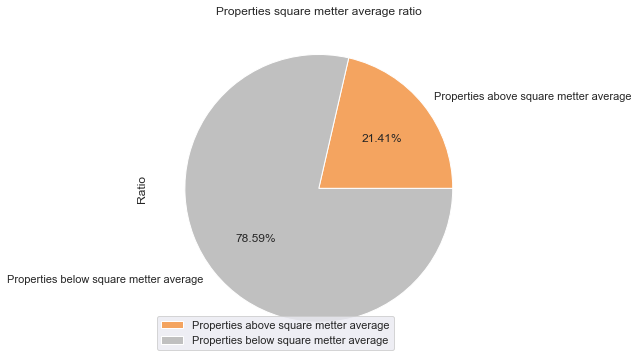

In [52]:
pie_chart = pd.DataFrame({'Ratio': [greater_ftg_avg, lower_ftg_avg]}, index=['Properties above square metter average', 'Properties below square metter average'])
chart = pie_chart.plot.pie(y='Ratio', figsize=(6,8), colors = ['sandybrown', 'silver'], autopct = "%.2f%%")
chart.set_title('Properties square metter average ratio')

###### From the chart representation of the data, we can easily conclude that most properties have less area than the average. That can say a lot about our data.

# Data infos

We can use functions to get pretty much any information that we need, such as std(), mean(), max(), min()

In [24]:
clean_data['Metragem'].max()

750000

Along with those functions, we can easilly find the properties with those caracteristics

In [25]:
clean_data[clean_data['Metragem'] == clean_data['Metragem'].max()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6421,Avenida George Saville Dodd,Jardim Guedala,São Paulo,750000,5,9,6,R$ 7.000.000


In [26]:
clean_data[clean_data['Metragem'] == clean_data['Metragem'].min()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6249,Rua Pestana,Vila Guaca,São Paulo,10,3,2,2,R$ 800.000


# Treating "Valor" column

#### First, we expand and separate the infos in the column

In [27]:
clean_data['Valor'].str.split(expand=True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,540.000,None
4,R$,1.980.000,None
...,...,...,...
6557,R$,665.000,None
6558,R$,2.300.000,None
6559,R$,1.050.000,None
6560,R$,2.200,/Mês


Note that once we're using a string function that is split(), we firstly have to call that as a string function, therefore the .str

#### Second, we check if there's no lost value in the "0" column

In [28]:
clean_data['Valor'].str.split(expand=True)[0].unique()

array(['R$'], dtype=object)

#### Now we add those new columns into our dataframe

In [29]:
clean_data[['Currency', 'Announcement_value', 'Type']] = clean_data['Valor'].str.split(expand=True)
clean_data.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Currency,Announcement_value,Type
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,R$,1.980.000,None


#### Filtering so that we only have the sales announcements

Note that we had both sales and rent annoucementes, but we only want to analyze the sales ones, so we need to filter them.

In [30]:
value_data = clean_data[clean_data['Type'].isnull()]
value_data

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Currency,Announcement_value,Type
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,R$,1.980.000,None
...,...,...,...,...,...,...,...,...,...,...,...
6556,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
6557,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
6558,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
6559,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [31]:
value_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6097 entries, 0 to 6561
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Rua                 6097 non-null   object
 1   Bairro              6097 non-null   object
 2   Cidade              6097 non-null   object
 3   Metragem            6097 non-null   int64 
 4   Quartos             6097 non-null   int64 
 5   Banheiros           6097 non-null   int64 
 6   Vagas               6097 non-null   int64 
 7   Valor               6097 non-null   object
 8   Currency            6097 non-null   object
 9   Announcement_value  6097 non-null   object
 10  Type                0 non-null      object
dtypes: int64(4), object(7)
memory usage: 571.6+ KB


Note that all of the collumns we added are in the "object" type, and not int ones. We need to change that so that we can use math expressions on the Price column

#### Replacing wrong informations

Note that the prices in the "Announcement_price" column have a dot separating the hundred each time. Python only accepts one dot with int or float types, so we need to change that for our functios to work.

In [32]:
avg_value = value_data['Announcement_value'].str.replace('.', '').astype(float).mean()
print(f'{avg_value:.2f}')

2730245.13


C:\Users\yan-r\AppData\Local\Temp\ipykernel_9296\3083596660.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  avg_value = value_data['Announcement_value'].str.replace('.', '').astype(float).mean()


Now we have the average price for all the properties that are in our dataframe.

# Getting the main informations with clean data

Now we can add that clean data format in a new value column

In [33]:
value_data['Announcement_value_f'] = value_data['Announcement_value'].str.replace('.', '').astype(float)
value_data

C:\Users\yan-r\AppData\Local\Temp\ipykernel_9296\3100385326.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  value_data['Announcement_value_f'] = value_data['Announcement_value'].str.replace('.', '').astype(float)
C:\Users\yan-r\AppData\Local\Temp\ipykernel_9296\3100385326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value_data['Announcement_value_f'] = value_data['Announcement_value'].str.replace('.', '').astype(float)


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Currency,Announcement_value,Type,Announcement_value_f
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,R$,1.980.000,None,1980000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6556,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.0
6557,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.0
6558,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.0
6559,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.0


In [34]:
value_data.describe().round(decimals=2)

,Metragem,Quartos,Banheiros,Vagas,Announcement_value_f
count,6097.00,6097.00,6097.00,6097.00,6097.00
mean,453.95,3.41,3.70,3.80,2730245.13
std,9615.51,1.05,1.84,2.58,3588365.04
min,10.00,1.00,1.00,1.00,13000.00
25%,160.00,3.00,2.00,2.00,850000.00
50%,254.00,3.00,3.00,3.00,1600000.00
75%,405.00,4.00,5.00,5.00,3150000.00
max,750000.00,16.00,14.00,50.00,65000000.00


# Chart plotting using SeaBorn

<AxesSubplot:xlabel='Announcement_value_f', ylabel='Count'>

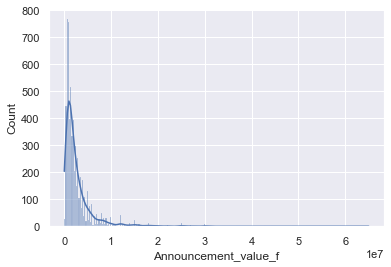

In [35]:
sns.set()
sns.histplot(data = value_data[['Banheiros', 'Vagas', 'Announcement_value_f']], x = 'Announcement_value_f', kde=True)

The histogram chart does not say much to us, me might try to zoom it out and set its limits to see if we find anything else.

(0.0, 7000000.0)

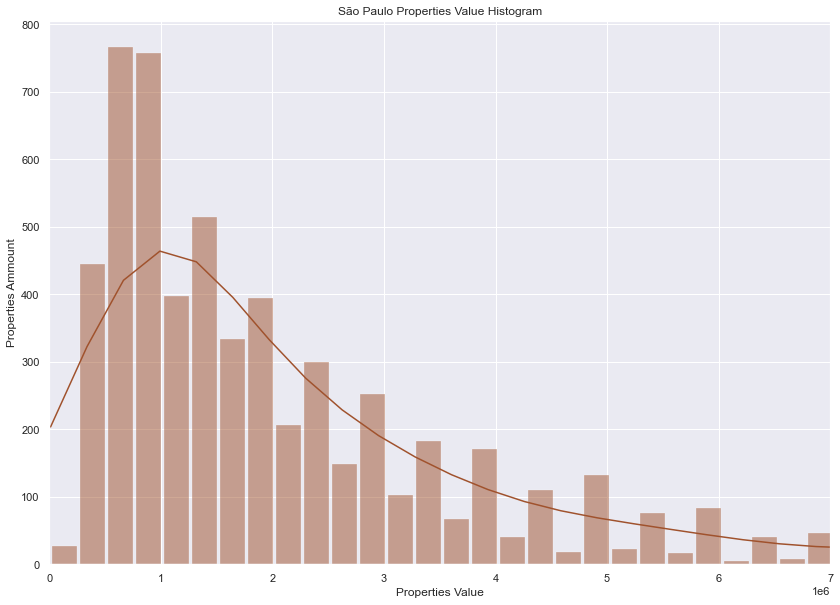

In [36]:
plt.figure(figsize=(14,10))

chart = sns.histplot(data=value_data, x='Announcement_value_f', kde=True, shrink=0.9, color='sienna')

chart.set_title('São Paulo Properties Value Histogram')
chart.set_xlabel('Properties Value')
chart.set_ylabel('Properties Ammount')

plt.xlim(0, 7000000)

##### This way, we can see that most of the properties price is in a range between 250.000 and 2.000.000 reais (brazilian currency)

# Square metter price per neighborhood

First we group the data for neighborhood

In [37]:
filtered_data = value_data.groupby(['Bairro']).sum().round(decimals=2)
pd.options.display.float_format = '{:.2f}'.format
filtered_data

,Metragem,Quartos,Banheiros,Vagas,Announcement_value_f
Bairro,,,,,
Aclimação,19067,252,233,222,136032801.00
Alto da Boa Vista,2756,29,36,33,16130000.00
Alto da Lapa,15221,167,209,185,112429000.00
Alto da Mooca,2793,53,41,57,17704400.00
Alto de Pinheiros,93992,861,1020,1061,1054505915.00
...,...,...,...,...,...
Vila dos Remédios,395,9,7,10,1740000.00
Vila Água Funda,761,13,11,13,3260000.00
Água Branca,1733,33,34,20,12218000.00


Then we get the total value of eich neighborhood and only then divide it for the square metter. 

In [38]:
filtered_data['R$/m2'] = filtered_data['Announcement_value_f'] / filtered_data['Metragem']
smetter_price = filtered_data.round(decimals=2).reset_index()
smetter_price

,Bairro,Metragem,Quartos,Banheiros,Vagas,Announcement_value_f,R$/m2
0,Aclimação,19067,252,233,222,136032801.00,7134.46
1,Alto da Boa Vista,2756,29,36,33,16130000.00,5852.69
2,Alto da Lapa,15221,167,209,185,112429000.00,7386.44
3,Alto da Mooca,2793,53,41,57,17704400.00,6338.85
4,Alto de Pinheiros,93992,861,1020,1061,1054505915.00,11219.10
...,...,...,...,...,...,...,...
593,Vila dos Remédios,395,9,7,10,1740000.00,4405.06
594,Vila Água Funda,761,13,11,13,3260000.00,4283.84
595,Água Branca,1733,33,34,20,12218000.00,7050.20
596,Água Fria,1795,31,37,26,10375000.00,5779.94


##### This way we discovered the square metter price for every neighborhood in our dataframe. If we want to take it further and show the most expensive ones, we also could. One important thing to notice now that we'll see the most expensive neighborhoods is start looking out for possible outliers.

In [39]:
filtered = smetter_price.sort_values(['R$/m2'], ascending=False)
filtered

,Bairro,Metragem,Quartos,Banheiros,Vagas,Announcement_value_f,R$/m2
449,Vila Guaca,10,3,2,2,800000.00,80000.00
91,Jardim Ampliação,70,9,6,6,2400000.00,34285.71
93,Jardim América,38004,228,286,415,1002909000.00,26389.56
134,Jardim Europa,58739,402,523,506,1108904900.00,18878.51
515,Vila Nova Conceição,20298,208,241,213,353270000.00,17404.18
...,...,...,...,...,...,...,...
150,Jardim Itapemirim,204,2,1,1,215118.00,1054.50
389,Vila Aurea,182,3,1,2,165000.00,906.59
248,Jardim Vila Carrão,386,3,2,6,295000.00,764.25
244,Jardim Vera Cruz(Zona Leste),1285,6,4,10,700000.00,544.75


Now, if we take a close look into our data, we'll see that our first index is an actual outlier, as our last one. We can assume that cause if we look into the column "Metragem", we'll find that it has a very small area, but a salty price. When we compare the value per square metter (column "R$/m2), we see that it's so much bigger than our second index. The same can be said about our last one, index 597, only this one has a very large area, and, thus, the value per square metter is very small.

#### We can simply slice those data so that our analisys gets more precise

In [40]:
filter_out = filtered[1:597]
filter_out

,Bairro,Metragem,Quartos,Banheiros,Vagas,Announcement_value_f,R$/m2
91,Jardim Ampliação,70,9,6,6,2400000.00,34285.71
93,Jardim América,38004,228,286,415,1002909000.00,26389.56
134,Jardim Europa,58739,402,523,506,1108904900.00,18878.51
515,Vila Nova Conceição,20298,208,241,213,353270000.00,17404.18
287,Morro dos Ingleses,1400,12,10,26,24300000.00,17357.14
...,...,...,...,...,...,...,...
92,Jardim Amália,120,2,2,1,130000.00,1083.33
150,Jardim Itapemirim,204,2,1,1,215118.00,1054.50
389,Vila Aurea,182,3,1,2,165000.00,906.59
248,Jardim Vila Carrão,386,3,2,6,295000.00,764.25


### If was in our interest, we could've sorted the neighborhoods that have square metter price above or under the average

In [41]:
average = smetter_price['R$/m2'].mean()
average

5063.292224080266

#### Above Average

In [42]:
above_avg = smetter_price[smetter_price['R$/m2'] > average]
above_avg.reset_index().drop(columns='index')

,Bairro,Metragem,Quartos,Banheiros,Vagas,Announcement_value_f,R$/m2
0,Aclimação,19067,252,233,222,136032801.00,7134.46
1,Alto da Boa Vista,2756,29,36,33,16130000.00,5852.69
2,Alto da Lapa,15221,167,209,185,112429000.00,7386.44
3,Alto da Mooca,2793,53,41,57,17704400.00,6338.85
4,Alto de Pinheiros,93992,861,1020,1061,1054505915.00,11219.10
...,...,...,...,...,...,...,...
220,Vila Vitório Mazzei,100,3,3,2,636000.00,6360.00
221,Vila da Saúde,3702,54,64,71,20877000.00,5639.38
222,Vila do Encontro,995,14,11,11,5064000.00,5089.45
223,Água Branca,1733,33,34,20,12218000.00,7050.20


#### Below Average

In [43]:
below_avg = smetter_price[smetter_price['R$/m2'] < average]
below_avg.reset_index().drop(columns='index')

,Bairro,Metragem,Quartos,Banheiros,Vagas,Announcement_value_f,R$/m2
0,Balneário Mar Paulista,250,4,4,10,900000.00,3600.00
1,Bela Vista,190,3,2,1,960000.00,5052.63
2,Bom Retiro,673,6,4,4,3000000.00,4457.65
3,Bortolândia,455,9,10,9,1830000.00,4021.98
4,Campininha,164,2,1,1,440000.00,2682.93
...,...,...,...,...,...,...,...
368,Vila do Bosque,1658,30,30,18,7279900.00,4390.77
369,Vila do Castelo,1813,17,14,22,4080000.00,2250.41
370,Vila dos Remédios,395,9,7,10,1740000.00,4405.06
371,Vila Água Funda,761,13,11,13,3260000.00,4283.84


# Presenting our analisys in a chart

Text(0, 0.5, 'Neighborhoods')

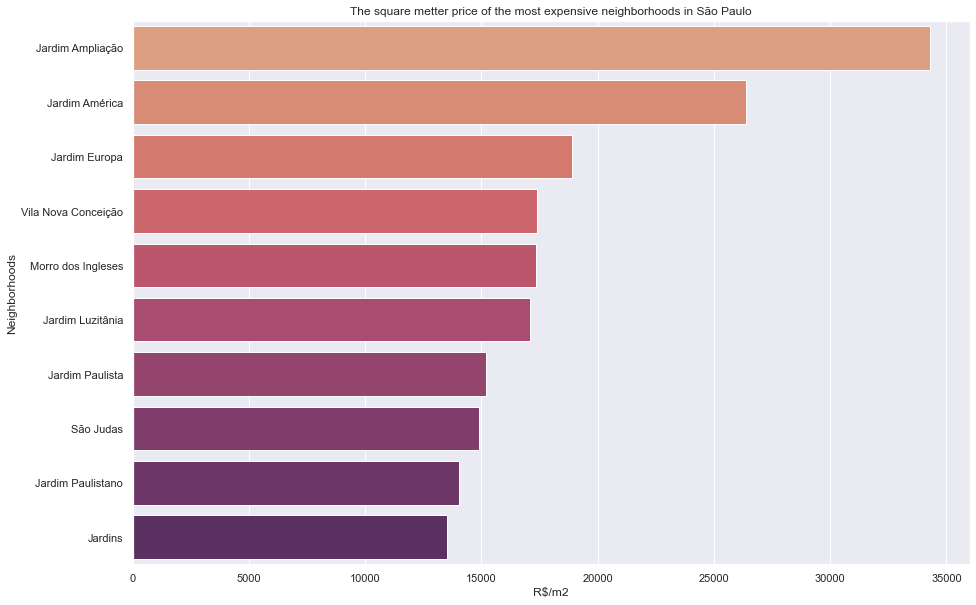

In [44]:
plt.figure(figsize=(15,10))
chart = sns.barplot(data = filter_out[0:10], y='Bairro', x='R$/m2', palette='flare')
chart.set_title('The square metter price of the most expensive neighborhoods in São Paulo')
chart.set_ylabel('Neighborhoods')

# Tracking down outliers

We can try to identify them with the dispersion chart

<Figure size 864x864 with 0 Axes>

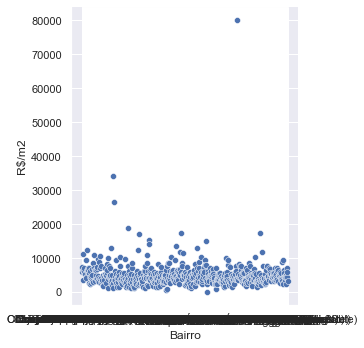

In [45]:
plt.figure(figsize=(12,12))
sns.relplot(data=smetter_price, x='Bairro', y='R$/m2')

We can clearly find out one outlier looking at this chart. For further analisys, this might not be the best one to look at, but it is usefull to see in a macro scale if we have outliers or not.

#### Using the candlesticks chart we come to the same conclusion as before

<AxesSubplot:>

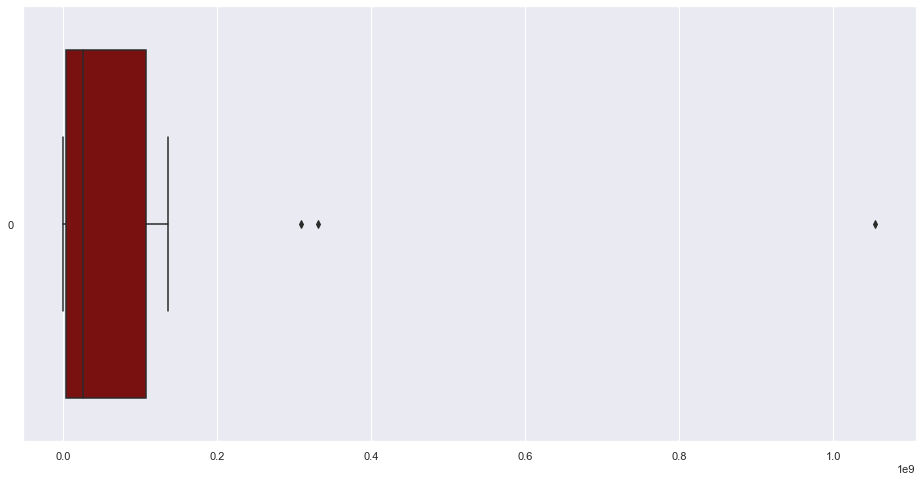

In [46]:
plt.figure(figsize=(16,8))
sns.boxplot(data=smetter_price['Announcement_value_f'][:20], orient='h', color='darkred')

#### We could also have used the function query to track down outliers

First we find out how many properties are for sale in each neighborhood

In [47]:
value_data['Bairro'].value_counts()

Alto de Pinheiros       218
Jardim Guedala          197
Brooklin Paulista       158
Vila Mariana            155
Planalto Paulista       148
                       ... 
Vila Picinin              1
Jardim Maria Augusta      1
Jardim Santa Maria        1
Parque do Castelo         1
Capela do Socorro         1
Name: Bairro, Length: 598, dtype: int64

In this case, we'll be analising the top 10 neighborhoods that have more properties for sale, since we have a lot of data, if we displayed that in a boxplot chart, we wouldn't get any information at all.

In [48]:
top_nbh = value_data['Bairro'].value_counts()[:10].index
top_nbh

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Brooklin Paulista',
       'Vila Mariana', 'Planalto Paulista', 'Pacaembu', 'Jardim Paulista',
       'Vila Madalena', 'Campo Belo', 'Jardim Europa'],
      dtype='object')

Text(0, 0.5, 'Value')

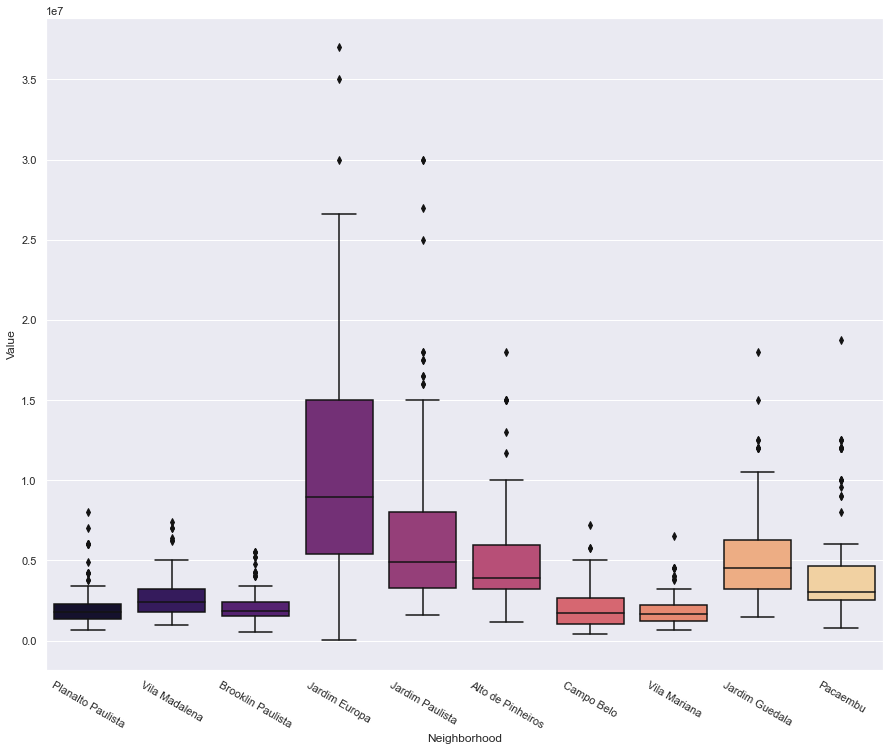

In [49]:
plt.figure(figsize=(15,12))
ax = sns.boxplot(data=value_data.query('Bairro in @top_nbh'), x='Bairro', y='Announcement_value_f', palette='magma')
ax.tick_params(axis='x', rotation=330)
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Value')

In this example, we were looking for outliers using the "Announcement_value_f" column, but we could have used any other info we wanted to analise. We can consider an outlier as the points that are beyond the upper limit in each neighborhood. In this case, before we remove them, it'd be important to analyse each and every one of them to see if they can be indeed removed and their info is not correct or it doens't fit in our sample. 

#### If we wanted another sample, we could analise the properties by the number of bedrooms as well

Text(0, 0.5, 'Bedrooms')

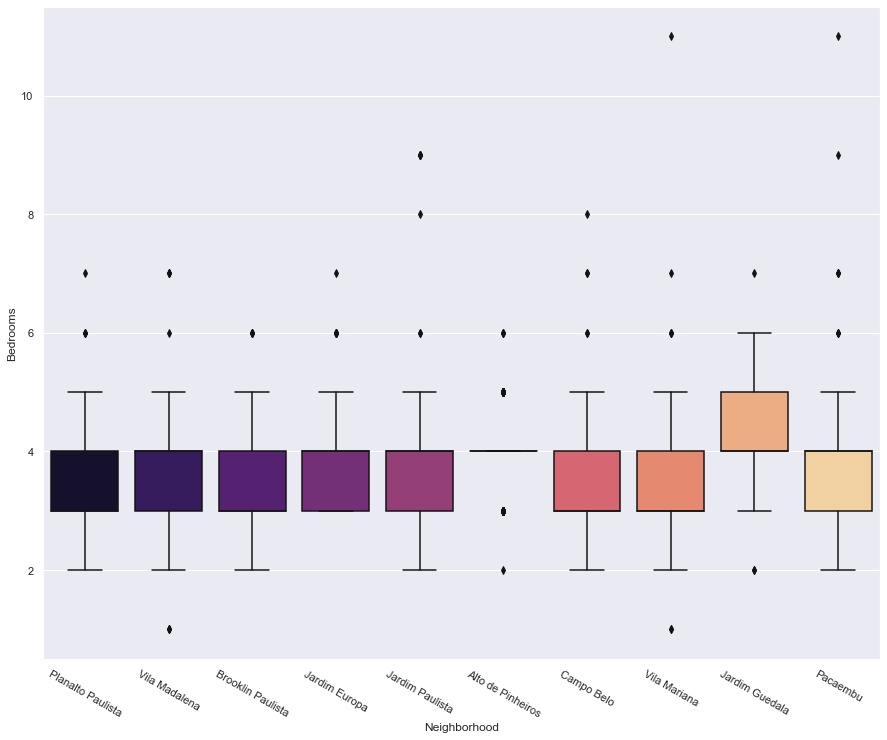

In [50]:
plt.figure(figsize=(15,12))
ax = sns.boxplot(data=value_data.query('Bairro in @top_nbh'), x='Bairro', y='Quartos', palette='magma')
ax.tick_params(axis='x', rotation=330)
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Bedrooms')

### At last, we could analise the square metters in on the top neighborhoods we're analising

In the matter of square metters, we saw before that we had a very large property that would disguise the rest of our data, so we have to filter it before we plot the chart.

Text(0, 0.5, 'Square Metters')

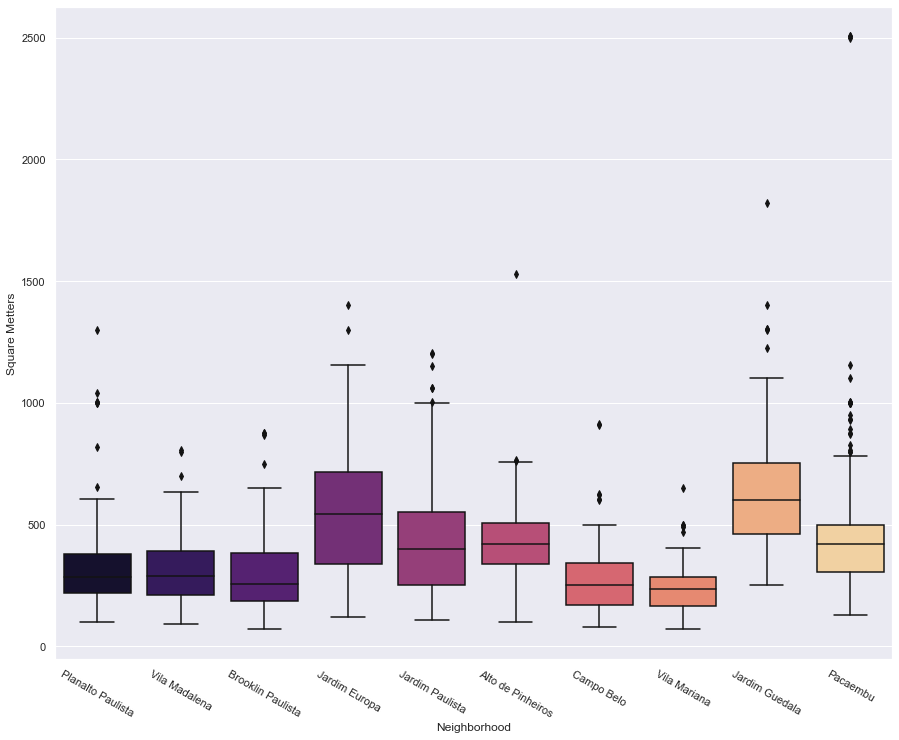

In [51]:
plt.figure(figsize=(15,12))
ax = sns.boxplot(data=value_data.query('Bairro in @top_nbh & Metragem < 50000'), x='Bairro', y='Metragem', palette='magma')
ax.tick_params(axis='x', rotation=330)
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Square Metters')

# Final Thougts

There are many analisys to be made using a dataframe like this, but for deeper understanding, we might need to combine this dataframe with others cointaining perhaps more information about the neighborhoods itself and the people who live in it. I took this Alura Immersion (which they provided the dataframe for us to work with) to practice and learn more about the usage of Pandas and Data Analises itself. It may seem that many things could've been done using Microsoft Excel, and, probably, they could. But, when comes down to big data, and bigger and bigger dataframes, Excel starts bugging and taking a very long time to do certain tasks. 

Once you start learning about Pandas itself, and its amazing usage, you might end with another tool to work with, and maybe take it even further than I did. 